In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,LSTM

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['18GU','total'])
    lista_twt2.append(twt_ods[date].loc['013B','total'])
    lista_twt3.append(twt_ods[date].loc['021S','total'])
    lista_twt4.append(twt_ods[date].loc['219M','total'])
    lista_twt5.append(twt_ods[date].loc['01CA','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['18GU','total'])
    lista_ine2.append(ine_ods[date].loc['013B','total'])
    lista_ine3.append(ine_ods[date].loc['021S','total'])
    lista_ine4.append(ine_ods[date].loc['219M','total'])
    lista_ine5.append(ine_ods[date].loc['01CA','total'])
    

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,0
2020-04-02,0
2020-04-03,0
2020-04-04,0
2020-04-05,0


In [10]:
df_ine.head()

,Viajes
2020-04-01,3314
2020-04-02,3220
2020-04-03,3934
2020-04-04,3141
2020-04-05,2520


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,1.148148
std,1.467235
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,6.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,4188.802469
std,922.684743
min,2282.000000
25%,3503.000000
50%,4243.000000
75%,4933.000000
max,5827.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,0.800000
2020-05-31,1.548387
2020-06-30,1.050000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,3410.966667
2020-05-31,4262.193548
2020-06-30,5241.800000


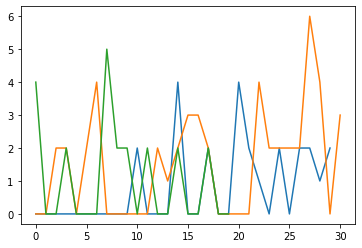

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

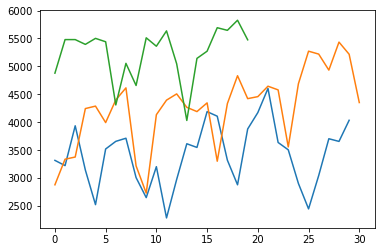

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
dataset_twt = df_twt.values
dataset_twt = dataset_twt.astype('float32')

dataset_ine = df_ine.values
dataset_ine = dataset_ine.astype('float32')

In [22]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

# Dividimos los datos en sets de entrenamiento y validacion

In [23]:
#dividimos nuestros valores entre sets de entrenamiento y de test
n_train_days = 60
train_twt = dataset_twt[:n_train_days, :]
test_twt = dataset_twt[n_train_days:, :]

train_ine = dataset_ine[:n_train_days, :]
test_ine = dataset_ine[n_train_days:, :]

print(len(train_twt), len(test_twt))

60 21


In [24]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset1, dataset2, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [25]:
# dividimos en entradas y salidas
look_back = 7
trainX, trainY = create_dataset(train_twt, train_ine, look_back)
testX, testY = create_dataset(test_twt, test_ine, look_back)

print(len(trainX), len(testY))

53 14


In [26]:
print(trainX)

[[[[0.29111427 0.        ]]

  [[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]]


 [[[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]]


 [[[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]]


 [[[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]]


 [[[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]

  [[0.

In [27]:
print(trainY)

[0.40310293 0.20394921 0.10267985 0.25923836 0.         0.19464034
 0.37517637 0.3565585  0.53765875 0.5145275  0.29196054 0.16755998
 0.44992954 0.5328632  0.65500706 0.38166434 0.34442878 0.17433006
 0.04569817 0.21438646 0.40056425 0.387024   0.49393517 0.16755998
 0.29703808 0.3080395  0.5531735  0.5655853  0.4823696  0.59689707
 0.6578279  0.2631876  0.12552893 0.5221439  0.59576875 0.62736255
 0.5593794  0.5379408  0.58194643 0.28688294 0.57856137 0.719323
 0.60338503 0.61354023 0.6662906  0.64767283 0.3590973  0.6787024
 0.84344155 0.82877296 0.7478139  0.88942176 0.8279267 ]


In [28]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 2))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 2))

In [29]:
print(trainX)

[[[0.29111427 0.        ]
  [0.26459807 0.        ]
  [0.46600848 0.        ]
  [0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]]

 [[0.26459807 0.        ]
  [0.46600848 0.        ]
  [0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]]

 [[0.46600848 0.        ]
  [0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  [0.20394921 0.        ]]

 [[0.24231315 0.        ]
  [0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  [0.20394921 0.        ]
  [0.10267985 0.        ]]

 [[0.06713682 0.        ]
  [0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  [0.20394921 0.        ]
  [0.10267985 0.        ]
  [0.25923836 0.33333334]]

 [[0.3486601  0.        ]
  [0.38730603 0.        ]
  [0.40310293 0.        ]
  

In [30]:
print(trainY)

[0.40310293 0.20394921 0.10267985 0.25923836 0.         0.19464034
 0.37517637 0.3565585  0.53765875 0.5145275  0.29196054 0.16755998
 0.44992954 0.5328632  0.65500706 0.38166434 0.34442878 0.17433006
 0.04569817 0.21438646 0.40056425 0.387024   0.49393517 0.16755998
 0.29703808 0.3080395  0.5531735  0.5655853  0.4823696  0.59689707
 0.6578279  0.2631876  0.12552893 0.5221439  0.59576875 0.62736255
 0.5593794  0.5379408  0.58194643 0.28688294 0.57856137 0.719323
 0.60338503 0.61354023 0.6662906  0.64767283 0.3590973  0.6787024
 0.84344155 0.82877296 0.7478139  0.88942176 0.8279267 ]


# Creamos la red neuronal

In [31]:
def crear_modeloFF():
    model = Sequential() 
    model.add(LSTM(20, input_shape=(look_back,2), return_sequences=True))
    model.add(LSTM(50, input_shape=(look_back,2), return_sequences=True))
    model.add(Dropout(0.30))
    model.add(LSTM(100, input_shape=(look_back,2)))
    model.add(Dropout(0.30))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

In [32]:
model = crear_modeloFF()

history=model.fit(trainX, trainY, epochs=200, validation_data=(testX,testY), batch_size=1, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 20)             1840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
____________________________________________________

Epoch 123/200
53/53 - 0s - loss: 0.0201 - val_loss: 0.0306
Epoch 124/200
53/53 - 0s - loss: 0.0188 - val_loss: 0.0503
Epoch 125/200
53/53 - 0s - loss: 0.0151 - val_loss: 0.0281
Epoch 126/200
53/53 - 0s - loss: 0.0186 - val_loss: 0.0304
Epoch 127/200
53/53 - 0s - loss: 0.0182 - val_loss: 0.0183
Epoch 128/200
53/53 - 0s - loss: 0.0180 - val_loss: 0.0357
Epoch 129/200
53/53 - 0s - loss: 0.0195 - val_loss: 0.0234
Epoch 130/200
53/53 - 0s - loss: 0.0207 - val_loss: 0.0314
Epoch 131/200
53/53 - 0s - loss: 0.0194 - val_loss: 0.0245
Epoch 132/200
53/53 - 0s - loss: 0.0174 - val_loss: 0.0226
Epoch 133/200
53/53 - 0s - loss: 0.0180 - val_loss: 0.0201
Epoch 134/200
53/53 - 0s - loss: 0.0168 - val_loss: 0.0242
Epoch 135/200
53/53 - 0s - loss: 0.0157 - val_loss: 0.0284
Epoch 136/200
53/53 - 0s - loss: 0.0159 - val_loss: 0.0234
Epoch 137/200
53/53 - 0s - loss: 0.0156 - val_loss: 0.0328
Epoch 138/200
53/53 - 0s - loss: 0.0175 - val_loss: 0.0346
Epoch 139/200
53/53 - 0s - loss: 0.0189 - val_loss: 0.02

# Visualizamos resultados

In [33]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100 # it is a percentage
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [34]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY_scalerInverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_scalerInverse = scaler.inverse_transform([testY])

In [35]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse[0], testPredict[:,0])
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 282.10 MAE
Resultado del entrenamiento: 119055.50 MSE
Resultado del entrenamiento: 345.04 RMSE
Resultado del entrenamiento: 8.84 CVRMSE
Resultado del entrenamiento: 7.76 MAPE 

Resultado del test: 412.31 MAE
Resultado del test: 247077.51 MSE
Resultado del test: 497.07 RMSE
Resultado del test: 9.58 CVRMSE
Resultado del test: 8.30 MAPE


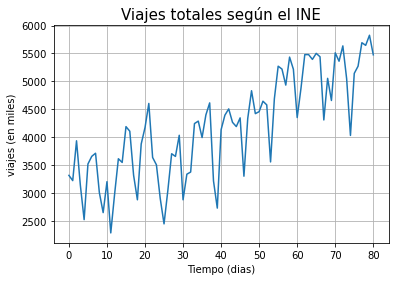

In [36]:
plt.plot(df_ine.values)
plt.grid(True)
plt.title("Viajes totales según el INE", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

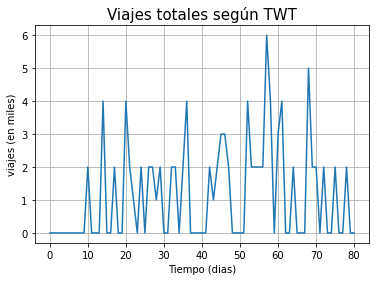

In [37]:
plt.plot(df_twt.values)
plt.grid(True)
plt.title("Viajes totales según TWT", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

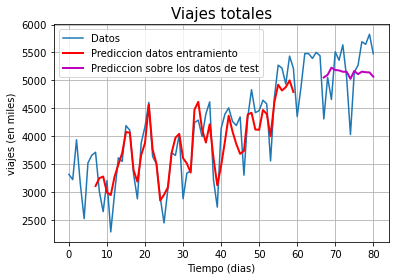

In [38]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset_ine)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset_ine)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset_ine), :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_ine))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

In [39]:
results=testPredict
print(len(results))

14


In [40]:
test = testY_scalerInverse[0]

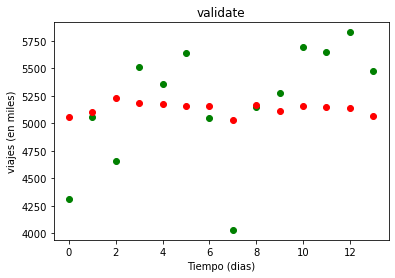

In [41]:
plt.scatter(range(len(test)),test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

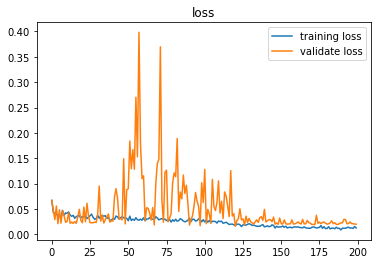

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

In [43]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

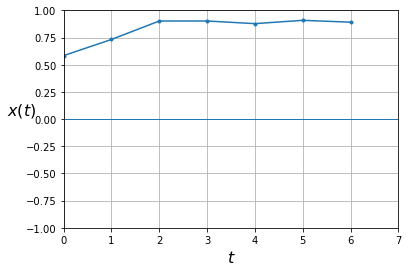

In [44]:
n_steps = 6
plot_series(testX[0, :, 0], testY_scalerInverse[0, 0], testPredict[0, 0])
plt.show()

# Exportar los datos

In [45]:
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-06-07', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(testPredict, index= index_days)
prediccion.columns = ['valor predicho']

prediccion

,valor predicho
2020-06-07,5052.247070
2020-06-08,5099.570312
2020-06-09,5227.163574
2020-06-10,5185.545898
2020-06-11,5178.076660
2020-06-12,5154.175293
2020-06-13,5154.526367
2020-06-14,5026.780273
2020-06-15,5167.831543
2020-06-16,5111.580078


In [46]:
datosReales = df_ine['2020-6-07':'2020-6-20']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']

compara

,real,prediccion
2020-06-07,4308,5052.247070
2020-06-08,5054,5099.570312
2020-06-09,4657,5227.163574
2020-06-10,5512,5185.545898
2020-06-11,5361,5178.076660
2020-06-12,5636,5154.175293
2020-06-13,5046,5154.526367
2020-06-14,4030,5026.780273
2020-06-15,5143,5167.831543
2020-06-16,5272,5111.580078


In [47]:
compara.to_excel('Resultados INE - TWT.xlsx', columns=['real', 'prediccion'])

# Prediccion a futuro

In [48]:
# usaremos 7 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-25':'2020-5-31']
Dias_ine = df_ine['2020-5-25':'2020-5-31']

In [49]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos, en este caso modificada para ayudarnos a crear
#los distintos sets de entrenmiento para distintos modelos que predeciran 1 dia cada uno

def create_dataset2(dataset1, dataset2, look_back=1, dias=0):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back-dias):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back + dias, 0])
  return np.array(dataX), np.array(dataY)

In [50]:
#ahora crearemos los sets para entrenar los modelos
look_back = 7

trainX1, trainY1 = create_dataset2(train_twt, train_ine, look_back, 1)
testX1, testY1 = create_dataset2(test_twt, test_ine, look_back, 1)

trainX2, trainY2 = create_dataset2(train_twt, train_ine, look_back, 2)
testX2, testY2 = create_dataset2(test_twt, test_ine, look_back, 2)

trainX3, trainY3 = create_dataset2(train_twt, train_ine, look_back, 3)
testX3, testY3 = create_dataset2(test_twt, test_ine, look_back, 3)

trainX4, trainY4 = create_dataset2(train_twt, train_ine, look_back, 4)
testX4, testY4 = create_dataset2(test_twt, test_ine, look_back, 4)

trainX5, trainY5 = create_dataset2(train_twt, train_ine, look_back, 5)
testX5, testY5 = create_dataset2(test_twt, test_ine, look_back, 5)

trainX6, trainY6 = create_dataset2(train_twt, train_ine, look_back, 6)
testX6, testY6 = create_dataset2(test_twt, test_ine, look_back, 6)

In [51]:
print(trainX1)

[[[[0.29111427 0.        ]]

  [[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]]


 [[[0.26459807 0.        ]]

  [[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]]


 [[[0.46600848 0.        ]]

  [[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]]


 [[[0.24231315 0.        ]]

  [[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]]


 [[[0.06713682 0.        ]]

  [[0.3486601  0.        ]]

  [[0.38730603 0.        ]]

  [[0.40310293 0.        ]]

  [[0.20394921 0.        ]]

  [[0.10267985 0.        ]]

  [[0.

In [52]:
print(trainY1)

[0.20394921 0.10267985 0.25923836 0.         0.19464034 0.37517637
 0.3565585  0.53765875 0.5145275  0.29196054 0.16755998 0.44992954
 0.5328632  0.65500706 0.38166434 0.34442878 0.17433006 0.04569817
 0.21438646 0.40056425 0.387024   0.49393517 0.16755998 0.29703808
 0.3080395  0.5531735  0.5655853  0.4823696  0.59689707 0.6578279
 0.2631876  0.12552893 0.5221439  0.59576875 0.62736255 0.5593794
 0.5379408  0.58194643 0.28688294 0.57856137 0.719323   0.60338503
 0.61354023 0.6662906  0.64767283 0.3590973  0.6787024  0.84344155
 0.82877296 0.7478139  0.88942176 0.8279267 ]


In [53]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]

trainX1 = np.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 2))
testX1 = np.reshape(testX1, (testX1.shape[0], testX1.shape[1], 2))

trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 2))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 2))

trainX3 = np.reshape(trainX3, (trainX3.shape[0], trainX3.shape[1], 2))
testX3 = np.reshape(testX3, (testX3.shape[0], testX3.shape[1], 2))

trainX4 = np.reshape(trainX4, (trainX4.shape[0], trainX4.shape[1], 2))
testX4 = np.reshape(testX4, (testX4.shape[0], testX4.shape[1], 2))

trainX5 = np.reshape(trainX5, (trainX5.shape[0], trainX5.shape[1], 2))
testX5 = np.reshape(testX5, (testX5.shape[0], testX5.shape[1], 2))

trainX6 = np.reshape(trainX6, (trainX6.shape[0], trainX6.shape[1], 2))
testX6 = np.reshape(testX6, (testX6.shape[0], testX6.shape[1], 2))

In [54]:
#creamos los distintos modelos para predecir cada dia

model1 = crear_modeloFF()
history=model1.fit(trainX1, trainY1, epochs=200, validation_data=(testX1,testY1), batch_size=1, verbose=2)

model2 = crear_modeloFF()
history=model2.fit(trainX2, trainY2, epochs=200, validation_data=(testX2,testY2), batch_size=1, verbose=2)

model3 = crear_modeloFF()
history=model3.fit(trainX3, trainY3, epochs=200, validation_data=(testX3,testY3), batch_size=1, verbose=2)

model4 = crear_modeloFF()
history=model4.fit(trainX4, trainY4, epochs=200, validation_data=(testX4,testY4), batch_size=1, verbose=2)

model5 = crear_modeloFF()
history=model5.fit(trainX5, trainY5, epochs=200, validation_data=(testX5,testY5), batch_size=1, verbose=2)

model6 = crear_modeloFF()
history=model6.fit(trainX6, trainY6, epochs=200, validation_data=(testX6,testY6), batch_size=1, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 20)             1840      
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
__________________________________________________

52/52 - 0s - loss: 0.0186 - val_loss: 0.0170
Epoch 123/200
52/52 - 0s - loss: 0.0188 - val_loss: 0.0184
Epoch 124/200
52/52 - 0s - loss: 0.0218 - val_loss: 0.0186
Epoch 125/200
52/52 - 0s - loss: 0.0192 - val_loss: 0.0291
Epoch 126/200
52/52 - 0s - loss: 0.0231 - val_loss: 0.0171
Epoch 127/200
52/52 - 0s - loss: 0.0209 - val_loss: 0.0178
Epoch 128/200
52/52 - 0s - loss: 0.0196 - val_loss: 0.0175
Epoch 129/200
52/52 - 0s - loss: 0.0226 - val_loss: 0.0235
Epoch 130/200
52/52 - 0s - loss: 0.0192 - val_loss: 0.0245
Epoch 131/200
52/52 - 0s - loss: 0.0201 - val_loss: 0.0173
Epoch 132/200
52/52 - 0s - loss: 0.0185 - val_loss: 0.0175
Epoch 133/200
52/52 - 0s - loss: 0.0186 - val_loss: 0.0176
Epoch 134/200
52/52 - 0s - loss: 0.0211 - val_loss: 0.0188
Epoch 135/200
52/52 - 0s - loss: 0.0208 - val_loss: 0.0172
Epoch 136/200
52/52 - 0s - loss: 0.0196 - val_loss: 0.0232
Epoch 137/200
52/52 - 0s - loss: 0.0208 - val_loss: 0.0173
Epoch 138/200
52/52 - 0s - loss: 0.0170 - val_loss: 0.0230
Epoch 139/2

Epoch 43/200
51/51 - 0s - loss: 0.0339 - val_loss: 0.1643
Epoch 44/200
51/51 - 0s - loss: 0.0301 - val_loss: 0.0966
Epoch 45/200
51/51 - 0s - loss: 0.0273 - val_loss: 0.4051
Epoch 46/200
51/51 - 0s - loss: 0.0355 - val_loss: 0.0769
Epoch 47/200
51/51 - 0s - loss: 0.0268 - val_loss: 0.2196
Epoch 48/200
51/51 - 0s - loss: 0.0302 - val_loss: 0.3723
Epoch 49/200
51/51 - 0s - loss: 0.0290 - val_loss: 0.0695
Epoch 50/200
51/51 - 0s - loss: 0.0313 - val_loss: 0.1309
Epoch 51/200
51/51 - 0s - loss: 0.0333 - val_loss: 0.0271
Epoch 52/200
51/51 - 0s - loss: 0.0319 - val_loss: 0.1009
Epoch 53/200
51/51 - 0s - loss: 0.0353 - val_loss: 0.2527
Epoch 54/200
51/51 - 0s - loss: 0.0288 - val_loss: 0.1135
Epoch 55/200
51/51 - 0s - loss: 0.0317 - val_loss: 0.3282
Epoch 56/200
51/51 - 0s - loss: 0.0328 - val_loss: 0.0680
Epoch 57/200
51/51 - 0s - loss: 0.0312 - val_loss: 0.1524
Epoch 58/200
51/51 - 0s - loss: 0.0270 - val_loss: 0.5649
Epoch 59/200
51/51 - 0s - loss: 0.0284 - val_loss: 0.3654
Epoch 60/200
5

Epoch 183/200
51/51 - 0s - loss: 0.0143 - val_loss: 0.0279
Epoch 184/200
51/51 - 0s - loss: 0.0109 - val_loss: 0.0203
Epoch 185/200
51/51 - 0s - loss: 0.0107 - val_loss: 0.0356
Epoch 186/200
51/51 - 0s - loss: 0.0099 - val_loss: 0.0322
Epoch 187/200
51/51 - 0s - loss: 0.0120 - val_loss: 0.0243
Epoch 188/200
51/51 - 0s - loss: 0.0119 - val_loss: 0.0374
Epoch 189/200
51/51 - 0s - loss: 0.0127 - val_loss: 0.0244
Epoch 190/200
51/51 - 0s - loss: 0.0132 - val_loss: 0.0327
Epoch 191/200
51/51 - 0s - loss: 0.0120 - val_loss: 0.0270
Epoch 192/200
51/51 - 0s - loss: 0.0144 - val_loss: 0.0207
Epoch 193/200
51/51 - 0s - loss: 0.0103 - val_loss: 0.0241
Epoch 194/200
51/51 - 0s - loss: 0.0142 - val_loss: 0.0188
Epoch 195/200
51/51 - 0s - loss: 0.0131 - val_loss: 0.0211
Epoch 196/200
51/51 - 0s - loss: 0.0094 - val_loss: 0.0288
Epoch 197/200
51/51 - 0s - loss: 0.0094 - val_loss: 0.0191
Epoch 198/200
51/51 - 0s - loss: 0.0097 - val_loss: 0.0263
Epoch 199/200
51/51 - 0s - loss: 0.0108 - val_loss: 0.02

50/50 - 0s - loss: 0.0218 - val_loss: 0.0564
Epoch 105/200
50/50 - 0s - loss: 0.0224 - val_loss: 0.0561
Epoch 106/200
50/50 - 0s - loss: 0.0249 - val_loss: 0.0267
Epoch 107/200
50/50 - 0s - loss: 0.0184 - val_loss: 0.0380
Epoch 108/200
50/50 - 0s - loss: 0.0238 - val_loss: 0.0581
Epoch 109/200
50/50 - 0s - loss: 0.0237 - val_loss: 0.0183
Epoch 110/200
50/50 - 0s - loss: 0.0196 - val_loss: 0.0316
Epoch 111/200
50/50 - 0s - loss: 0.0235 - val_loss: 0.0160
Epoch 112/200
50/50 - 0s - loss: 0.0213 - val_loss: 0.0268
Epoch 113/200
50/50 - 0s - loss: 0.0236 - val_loss: 0.0314
Epoch 114/200
50/50 - 0s - loss: 0.0195 - val_loss: 0.0273
Epoch 115/200
50/50 - 0s - loss: 0.0214 - val_loss: 0.0300
Epoch 116/200
50/50 - 0s - loss: 0.0223 - val_loss: 0.0171
Epoch 117/200
50/50 - 0s - loss: 0.0223 - val_loss: 0.0158
Epoch 118/200
50/50 - 0s - loss: 0.0185 - val_loss: 0.0233
Epoch 119/200
50/50 - 0s - loss: 0.0205 - val_loss: 0.0184
Epoch 120/200
50/50 - 0s - loss: 0.0197 - val_loss: 0.0219
Epoch 121/2

49/49 - 0s - loss: 0.0360 - val_loss: 0.0706
Epoch 25/200
49/49 - 0s - loss: 0.0313 - val_loss: 0.0330
Epoch 26/200
49/49 - 0s - loss: 0.0376 - val_loss: 0.2680
Epoch 27/200
49/49 - 0s - loss: 0.0362 - val_loss: 0.0988
Epoch 28/200
49/49 - 0s - loss: 0.0440 - val_loss: 0.0267
Epoch 29/200
49/49 - 0s - loss: 0.0302 - val_loss: 0.1148
Epoch 30/200
49/49 - 0s - loss: 0.0325 - val_loss: 0.0811
Epoch 31/200
49/49 - 0s - loss: 0.0293 - val_loss: 0.3485
Epoch 32/200
49/49 - 0s - loss: 0.0248 - val_loss: 0.1548
Epoch 33/200
49/49 - 0s - loss: 0.0307 - val_loss: 0.0967
Epoch 34/200
49/49 - 0s - loss: 0.0287 - val_loss: 0.2556
Epoch 35/200
49/49 - 0s - loss: 0.0270 - val_loss: 0.1200
Epoch 36/200
49/49 - 0s - loss: 0.0324 - val_loss: 0.1953
Epoch 37/200
49/49 - 0s - loss: 0.0319 - val_loss: 0.3399
Epoch 38/200
49/49 - 0s - loss: 0.0324 - val_loss: 0.2359
Epoch 39/200
49/49 - 0s - loss: 0.0298 - val_loss: 0.3254
Epoch 40/200
49/49 - 0s - loss: 0.0290 - val_loss: 0.3843
Epoch 41/200
49/49 - 0s - l

Epoch 165/200
49/49 - 0s - loss: 0.0138 - val_loss: 0.0390
Epoch 166/200
49/49 - 0s - loss: 0.0128 - val_loss: 0.0254
Epoch 167/200
49/49 - 0s - loss: 0.0153 - val_loss: 0.0230
Epoch 168/200
49/49 - 0s - loss: 0.0101 - val_loss: 0.0221
Epoch 169/200
49/49 - 0s - loss: 0.0104 - val_loss: 0.0254
Epoch 170/200
49/49 - 0s - loss: 0.0126 - val_loss: 0.0222
Epoch 171/200
49/49 - 0s - loss: 0.0156 - val_loss: 0.0245
Epoch 172/200
49/49 - 0s - loss: 0.0143 - val_loss: 0.0252
Epoch 173/200
49/49 - 0s - loss: 0.0142 - val_loss: 0.0267
Epoch 174/200
49/49 - 0s - loss: 0.0109 - val_loss: 0.0323
Epoch 175/200
49/49 - 0s - loss: 0.0104 - val_loss: 0.0352
Epoch 176/200
49/49 - 0s - loss: 0.0094 - val_loss: 0.0399
Epoch 177/200
49/49 - 0s - loss: 0.0108 - val_loss: 0.0306
Epoch 178/200
49/49 - 0s - loss: 0.0102 - val_loss: 0.0388
Epoch 179/200
49/49 - 0s - loss: 0.0090 - val_loss: 0.0265
Epoch 180/200
49/49 - 0s - loss: 0.0119 - val_loss: 0.0290
Epoch 181/200
49/49 - 0s - loss: 0.0091 - val_loss: 0.02

Epoch 86/200
48/48 - 0s - loss: 0.0164 - val_loss: 0.3255
Epoch 87/200
48/48 - 0s - loss: 0.0183 - val_loss: 0.3901
Epoch 88/200
48/48 - 0s - loss: 0.0306 - val_loss: 0.4195
Epoch 89/200
48/48 - 0s - loss: 0.0240 - val_loss: 0.1515
Epoch 90/200
48/48 - 0s - loss: 0.0198 - val_loss: 0.2128
Epoch 91/200
48/48 - 0s - loss: 0.0219 - val_loss: 0.3376
Epoch 92/200
48/48 - 0s - loss: 0.0191 - val_loss: 0.3671
Epoch 93/200
48/48 - 0s - loss: 0.0182 - val_loss: 0.5025
Epoch 94/200
48/48 - 0s - loss: 0.0188 - val_loss: 0.2036
Epoch 95/200
48/48 - 0s - loss: 0.0175 - val_loss: 0.1149
Epoch 96/200
48/48 - 0s - loss: 0.0198 - val_loss: 0.3530
Epoch 97/200
48/48 - 0s - loss: 0.0240 - val_loss: 0.1335
Epoch 98/200
48/48 - 0s - loss: 0.0224 - val_loss: 0.1055
Epoch 99/200
48/48 - 0s - loss: 0.0162 - val_loss: 0.2187
Epoch 100/200
48/48 - 0s - loss: 0.0170 - val_loss: 0.3045
Epoch 101/200
48/48 - 0s - loss: 0.0193 - val_loss: 0.2642
Epoch 102/200
48/48 - 0s - loss: 0.0197 - val_loss: 0.2619
Epoch 103/2

Epoch 6/200
47/47 - 0s - loss: 0.0446 - val_loss: 0.1313
Epoch 7/200
47/47 - 0s - loss: 0.0458 - val_loss: 0.1014
Epoch 8/200
47/47 - 0s - loss: 0.0391 - val_loss: 0.0453
Epoch 9/200
47/47 - 0s - loss: 0.0451 - val_loss: 0.0533
Epoch 10/200
47/47 - 0s - loss: 0.0414 - val_loss: 0.0269
Epoch 11/200
47/47 - 0s - loss: 0.0387 - val_loss: 0.0920
Epoch 12/200
47/47 - 0s - loss: 0.0490 - val_loss: 0.0379
Epoch 13/200
47/47 - 0s - loss: 0.0439 - val_loss: 0.2219
Epoch 14/200
47/47 - 0s - loss: 0.0506 - val_loss: 0.1091
Epoch 15/200
47/47 - 0s - loss: 0.0496 - val_loss: 0.0836
Epoch 16/200
47/47 - 0s - loss: 0.0371 - val_loss: 0.0569
Epoch 17/200
47/47 - 0s - loss: 0.0401 - val_loss: 0.0773
Epoch 18/200
47/47 - 0s - loss: 0.0385 - val_loss: 0.0288
Epoch 19/200
47/47 - 0s - loss: 0.0415 - val_loss: 0.0368
Epoch 20/200
47/47 - 0s - loss: 0.0390 - val_loss: 0.0363
Epoch 21/200
47/47 - 0s - loss: 0.0386 - val_loss: 0.0406
Epoch 22/200
47/47 - 0s - loss: 0.0398 - val_loss: 0.0427
Epoch 23/200
47/47

Epoch 147/200
47/47 - 0s - loss: 0.0130 - val_loss: 0.0198
Epoch 148/200
47/47 - 0s - loss: 0.0116 - val_loss: 0.0218
Epoch 149/200
47/47 - 0s - loss: 0.0124 - val_loss: 0.0260
Epoch 150/200
47/47 - 0s - loss: 0.0120 - val_loss: 0.0214
Epoch 151/200
47/47 - 0s - loss: 0.0109 - val_loss: 0.0252
Epoch 152/200
47/47 - 0s - loss: 0.0115 - val_loss: 0.0300
Epoch 153/200
47/47 - 0s - loss: 0.0111 - val_loss: 0.0180
Epoch 154/200
47/47 - 0s - loss: 0.0100 - val_loss: 0.0273
Epoch 155/200
47/47 - 0s - loss: 0.0110 - val_loss: 0.0255
Epoch 156/200
47/47 - 0s - loss: 0.0088 - val_loss: 0.0217
Epoch 157/200
47/47 - 0s - loss: 0.0111 - val_loss: 0.0291
Epoch 158/200
47/47 - 0s - loss: 0.0111 - val_loss: 0.0244
Epoch 159/200
47/47 - 0s - loss: 0.0094 - val_loss: 0.0281
Epoch 160/200
47/47 - 0s - loss: 0.0080 - val_loss: 0.0272
Epoch 161/200
47/47 - 0s - loss: 0.0122 - val_loss: 0.0330
Epoch 162/200
47/47 - 0s - loss: 0.0077 - val_loss: 0.0305
Epoch 163/200
47/47 - 0s - loss: 0.0095 - val_loss: 0.03

# Preparamos los datos para el test

In [55]:
# cargamos el dataframe en la variable dataset
dataset_twt = Dias_twt.values
dataset_ine = Dias_ine.values

# convertimos los enteros en floats
dataset_twt = dataset_twt.astype('float32')
dataset_ine = dataset_ine.astype('float32')

# normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

In [56]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset3(dataset1, dataset2):
  dataX = []
  for x in range(len(dataset2)):
    dataX.append(dataset2[x])  
    dataX.append(dataset1[x])
  dataX = np.array(dataX)
  dataX = np.reshape(dataX, (7, 1, 2))
  return np.array(dataX)

In [57]:
# usamos la funcion definida previamente para crear el dataset
testX = create_dataset3(dataset_twt, dataset_ine)

In [58]:
#remodelamos los datos
testX = np.reshape(testX, (1, 7, 2))

# Realizamos la prediccion 

In [59]:
results = []

parcial=model.predict(testX)
results.append(parcial[0])

parcial=model1.predict(testX)
results.append(parcial[0])

parcial=model2.predict(testX)
results.append(parcial[0])

parcial=model3.predict(testX)
results.append(parcial[0])

parcial=model4.predict(testX)
results.append(parcial[0])

parcial=model5.predict(testX)
results.append(parcial[0])

parcial=model6.predict(testX)
results.append(parcial[0])

results = np.reshape(results, (7, 1))
print(results)

[[0.5240928 ]
 [0.76208186]
 [0.6018549 ]
 [0.75107837]
 [0.76904374]
 [0.8803752 ]
 [0.50521755]]


# Re-Convertimos los resultados

In [60]:
inverted = scaler.inverse_transform(results)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)

inverted

array([[4919],
       [5177],
       [5003],
       [5165],
       [5185],
       [5305],
       [4899]])

# Visualizamos el pronostico

<AxesSubplot:>

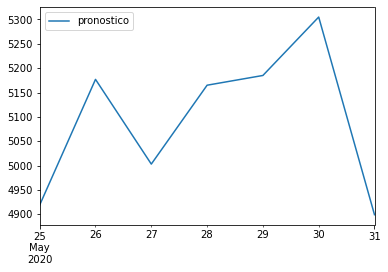

In [61]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [62]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,4688,4919
2020-05-26,5272,5177
2020-05-27,5220,5003
2020-05-28,4933,5165
2020-05-29,5435,5185
2020-05-30,5217,5305
2020-05-31,4351,4899


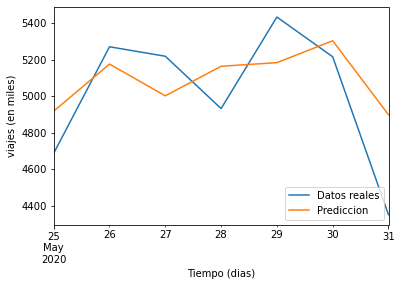

In [63]:
compara['real'].plot()
compara['prediccion'].plot()
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.legend( ('Datos reales', 'Prediccion'), loc = 'lower right')

In [64]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 237.29 MAE
Resultado del test: 76263.86 MSE
Resultado del test: 276.16 RMSE
Resultado del test: 5.42 CVRMSE
Resultado del test: 4.72 MAPE


In [65]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 231.00 MAE
Resultado del test dia 1: 53361.00 MSE
Resultado del test dia 1: 231.00 RMSE
Resultado del test dia 1: 4.70 CVRMSE
Resultado del test dia 1: 4.70 MAPE 

Resultado del test dia 2: 95.00 MAE
Resultado del test dia 2: 9025.00 MSE
Resultado del test dia 2: 95.00 RMSE
Resultado del test dia 2: 1.84 CVRMSE
Resultado del test dia 2: 1.84 MAPE 

Resultado del test dia 3: 217.00 MAE
Resultado del test dia 3: 47089.00 MSE
Resultado del test dia 3: 217.00 RMSE
Resultado del test dia 3: 4.34 CVRMSE
Resultado del test dia 3: 4.34 MAPE 

Resultado del test dia 4: 232.00 MAE
Resultado del test dia 4: 53824.00 MSE
Resultado del test dia 4: 232.00 RMSE
Resultado del test dia 4: 4.49 CVRMSE
Resultado del test dia 4: 4.49 MAPE 

Resultado del test dia 5: 250.00 MAE
Resultado del test dia 5: 62500.00 MSE
Resultado del test dia 5: 250.00 RMSE
Resultado del test dia 5: 4.82 CVRMSE
Resultado del test dia 5: 4.82 MAPE 

Resultado del test dia 6: 88.00 MAE
Resultado del tes